In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle
from imblearn.over_sampling import SMOTE

In [62]:
df = pd.read_csv('./data/CICIDS2017.csv')

In [63]:
df.Label.value_counts()

Label
BENIGN          22731
DoS             19035
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: count, dtype: int64

In [64]:
df_minor = df[(df['Label']=='WebAttack')|(df['Label']=='Bot')|(df['Label']=='Infiltration')]
df_BENIGN = df[(df['Label']=='BENIGN')]
df_BENIGN = df_BENIGN.sample(n=None, frac=0.01, replace=False, weights=None, random_state=None, axis=0)
df_DoS = df[(df['Label']=='DoS')]
df_DoS = df_DoS.sample(n=None, frac=0.05, replace=False, weights=None, random_state=None, axis=0)
df_PortScan = df[(df['Label']=='PortScan')]
df_PortScan = df_PortScan.sample(n=None, frac=0.05, replace=False, weights=None, random_state=None, axis=0)
df_BruteForce = df[(df['Label']=='BruteForce')]
df_BruteForce = df_BruteForce.sample(n=None, frac=0.2, replace=False, weights=None, random_state=None, axis=0)

In [65]:
df_s = pd.concat([df_BENIGN, df_DoS, df_PortScan, df_BruteForce, df_minor])
df_s = df_s.sort_index()

In [66]:
# Save the sampled dataset
df_s.to_csv('./data/CICIDS2017_sample.csv',index=0)

In [67]:
df = pd.read_csv('./data/CICIDS2017_sample.csv')

In [68]:
# Min-max normalization
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
df = df.fillna(0)

In [69]:
df.sample()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
5718,0.691713,0.001449,0.001086,0.000123,0.063119,0.014812,0.0,0.006583,0.016328,0.499526,...,0.0,0.000029,0.0,0.000024,0.000038,0.695798,0.0,0.695798,0.695798,DoS


In [70]:
#split train set and test set
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.drop(['Label'],axis=1).values 
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [85]:
y_test[0:100]

array([2, 6, 1, 6, 5, 1, 6, 1, 1, 6, 6, 1, 6, 1, 5, 3, 1, 1, 6, 1, 1, 6,
       3, 1, 2, 6, 6, 1, 3, 1, 1, 1, 5, 1, 2, 0, 1, 6, 6, 2, 6, 6, 1, 1,
       3, 3, 1, 2, 6, 1, 3, 6, 1, 3, 6, 5, 1, 1, 6, 1, 6, 1, 6, 6, 0, 6,
       3, 6, 3, 6, 6, 1, 6, 3, 1, 2, 2, 2, 5, 6, 0, 6, 1, 6, 6, 6, 2, 1,
       6, 3, 1, 3, 6, 3, 1, 6, 2, 1, 2, 6], dtype=object)

In [72]:
pd.Series(y_train).value_counts()

6    1744
1    1573
3     761
2     442
5     317
0     182
4      29
Name: count, dtype: int64

In [73]:
smote=SMOTE(n_jobs=-1,sampling_strategy={4:1500}) # Create 1500 samples for the minority class "4"

In [74]:
# Checking for missing values using numpy.isnan
if np.isnan(y_train.astype(int)).any():
    print("Warning: y_train contains missing values.")

# Checking for missing values using pandas.isnull (if y_train is a pandas Series)
# if pd.isnull(y_train).any():
#     print("Warning: y_train contains missing values.")

In [75]:
X_train, y_train = smote.fit_resample(X_train, y_train.astype(int))

/Users/red/Documents/Code/Research/new/venv/lib/python3.9/site-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [78]:
pd.Series(y_train).value_counts()

6    1744
1    1573
4    1500
3     761
2     442
5     317
0     182
Name: count, dtype: int64

In [76]:
# # Store the partitions as pickle files
# with open('./data/X_train_sample.pickle', 'wb') as f:
#     pickle.dump(X_train, f)
    
# with open('./data/X_test_sample.pickle', 'wb') as f:
#     pickle.dump(X_test, f)
    
# with open('./data/y_train_sample.pickle', 'wb') as f:
#     pickle.dump(y_train, f)
    
# with open('./data/y_test_sample.pickle', 'wb') as f:
#     pickle.dump(y_test, f)

In [88]:
# Load the stored partitions
with open('./data/X_train_sample.pickle', 'rb') as f:
    X_train = pickle.load(f)

with open('./data/X_test_sample.pickle', 'rb') as f:
    X_test = pickle.load(f)

with open('./data/y_train_sample.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open('./data/y_test_sample.pickle', 'rb') as f:
    y_test = pickle.load(f)

Accuracy of DT: 0.9841646872525732
Precision of DT: 0.9843185764647819
Recall of DT: 0.9841646872525732
F1-score of DT: 0.9838635546769349
              precision    recall  f1-score   support

           0       0.95      0.78      0.85        45
           1       1.00      0.99      0.99       393
           2       0.98      0.96      0.97       111
           3       0.96      1.00      0.98       191
           4       0.62      0.71      0.67         7
           5       0.99      1.00      0.99        80
           6       0.99      1.00      1.00       436

    accuracy                           0.98      1263
   macro avg       0.93      0.92      0.92      1263
weighted avg       0.98      0.98      0.98      1263



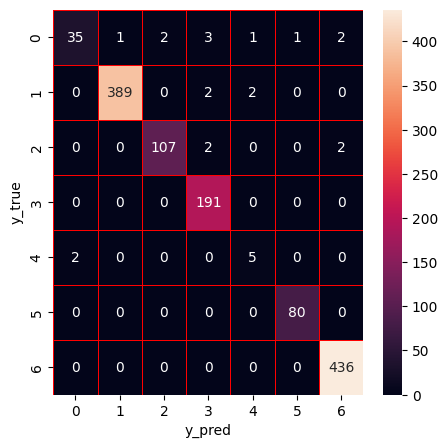

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support

# Decision tree training and prediction
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()